# Breast Cancer Prediction - Logistic Regression & Random Forest + RFECV

This dataset is computed from a digitized image of [a fine needle aspirate(FNA)](https://www.worcsacute.nhs.uk/pathology/pathology-fine-needle-aspiration) of a breast mass. It consists of 33 attributes and 569 subjects. We will classify the breast cancer with logistic regression and random forest. Also, we eill perform Recursive Feature Elimination with Cross-validation for both models to reduce features and identidy the best features.
Data from Kaggle Dataset: [Breast Cancer Wisconsin (Diagnostic) Data set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

### Objective
* We will try to predict breast cancer from the dataset, a digitized image of a fine needle aspiration (FNA) of a breast mass.

### Techniques
* We will build models using Logistic Regression and Random Forest Classifier.
* We will use Recursive Feature Elimination, Cross-validated (RFECV) feature selection to choose the best subset for the score of the model. 

#### What is Fine Needle Aspiration (FNA)?  
* [Fine Needle Aspiration (FNA)](https://www.myvmc.com/investigations/fine-needle-aspiration-biopsy-fna/) is usually performed on suspicious lump if abnormality is found on test such as x-ray, ultrasound or mammography.

### Table of Contents
1. [Data Description](#1.-Data-Description)
2. [Data Preparation](#2.-Data-Preparation)<br>
    2-1. [Import Libraries](#2-1.-Import-Libraries)<br>
    2-2. [Load Dataset](#2-2.-Load-Dataset)<br>
    2-3. [Preview Data](#2-3.-Preview-Data)<br>
3. [Data Cleaning](#3.-Data-Cleaning)<br>
    3-1. [Check Missing Values](#3-1.-Check-Missing-Values)<br>
    3-2. [Feature Selection](#3-2.-Feature-Selection)<br>
    3-3. [Encode Categorical Data](#3-3.-Encode-Categorical-Data)<br>
    3-4. [Recheck the Cleaned Data](#3-4.-Recheck-the-Cleaned-Data)<br>
4. [Data Visualization](#4.-Data-Visualization)<br>
    4-1. [Malignant vs Benin](#4-1.-Malignant-vs-Benin)<br>
    4-2. [Distribution of Features](#4-2.-Distribution-of-Features)<br>
    4-3. [Correlation Heatmap](#4-3.-Correlation-Heatmap)<br>
    4-4. [Feature Scaling](#4-4.-Feature-Scaling)<br>
    4-5. [Mean Features vs Diagnosis](#4-5.-Mean-Features-vs-Diagnosis)<br>
    4-6. [Standard Error Features vs Diagnosis](#4-6.-Standard-Error-Features-vs-Diagnosis)<br>
    4-7. [Worst Features vs Diagnosis](#4-7.-Worst-Features-vs-Diagnosis)<br>
5. [Training and Testing Data Split](#5.-Training-and-Testing-Data-Split)<br>
6. [Model Building](#6.-Model-Building)<br>
    6-1. [Logistic Regression](#6-1.-Logistic-Regression)<br>
    6-2. [Random Forest](#6-2.-Random-Forest)<br>  
7. [Recursive Feature Elimination with Cross-validation (RFECV)](#7.-Recursive-Feature-Elimination-with-Cross-validation-(RFECV))<br>
    7-1. [RFECV for Logistic Regression](#7-1.-RFECV-for-Logistic-Regression)  
    7-2. [RFECV for Random Forest](#7-2.-RFECV-for-Random-Forest)
8. [Confusion Matrix](#8.-Confusion-Matrix)<br>


# 1. Data Description
This dataset is computed from a digitized image of a [fine needle aspiration (FNA)](https://www.worcsacute.nhs.uk/pathology/pathology-fine-needle-aspiration) of a breast mass. It consists of 33 attributes and 569 subjects. 

The dataset from Kaggle: [Breast Cancer Wisconsin (Diagnostic) Data set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

### Attribute Infomation:
1. <span style="color:blue">**id**</span>: ID number
2. <span style="color:blue">**diagnosis**</span>: M = Malignant, B = Benign  

10 real-valued features are computed for each cell nucleus:  
3. <span style="color:blue">**radius**</span>: mean of distances from center to points on the perimeter  
4. <span style="color:blue">**texture**</span>: standard deviation of gray-scale values  
5. <span style="color:blue">**perimeter**</span>:  
6. <span style="color:blue">**area**</span>:  
7. <span style="color:blue">**smoothness**</span>: local variation in radius lengths  
8. <span style="color:blue">**compactness**</span>: perimeter^2/area-1.0  
9. <span style="color:blue">**concavity**</span>: severity of concave portions of the contour  
10. <span style="color:blue">**concave points**</span>: number of concave portions of the contour  
11. <span style="color:blue">**symmetry**</span>:  
12. <span style="color:blue">**fractal dimension**</span>: "coastline approximation"-1  

The <span style="color:blue">**mean**</span>, <span style="color:blue">**standard error**</span> and "<span style="color:blue">**worst**</span>" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# 2. Data Preparation
### 2-1. Import Libraries
We will use the matplotlib and seaborn library for data visualization and the scikit-learn for building machine learning model. 

In [1]:
# For data processing and analysis
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

# For preprocessing dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Recursive Feature Elimination with Cross-Validation
# To identify the best features by reducing less important features
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# For model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, auc

### 2-2. Load Dataset

In [2]:
# Load Dataset as CSV file
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

### 2-3. Preview Data
Firstly, we will look over dataset

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Variable identification
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


As you can see the datatype, most of the variable is conntinuous variable without **'diagnosis'**, which is a predictor on our model. 
We can see the relationship between features. 
So, we will explore the dataset.

# 3. Data Cleaning
### 3-1. Check Missing Values
Let's check if there is a missing value or not.

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df['Unnamed: 32'].unique()

array([nan])

### 3-2. Feature Selection 
We will remove <span style="color:blue">**'Unnamed: 32'**</span>, includes missing values as 'NaN'.
Also, <span style="color:blue">**'id'**</span> column will be removed because we are going to train a model to understand general patterns. 

### 3-3. Encode Categorical Data

In [7]:
def drop_and_encode_features(data):
    """
    - Drop 'id' and 'Unnamed: 32' columns
    - Encode 'diagnosis' to numerical variable
    """
    data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
    
    label = LabelEncoder()
    data['diagnosis'] = label.fit_transform(data['diagnosis'])
    return data

### 3-4. Recheck the Cleaned Data

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# 4. Data Visualization
**Exploratory Data Analysis (EDA)** is a critical process of visualizing, summarizing and interpreting the dataset to allows us to discover certain insights, patterns and statistical measure.



### 1. Diagnosis (Malignant vs Benin)
Explaining the frequency of **'Malignant'** and **'Benign'** in <span style="color:blue">'diagnosis'</span>.

In [10]:
def get_freq_diagnosis(data):
    """
    Visualize the frequency of 'Malignant' and 'Benign' in 'diagnosis' using pie chart
    """
    result = data['diagnosis'].value_counts()
    values = [result['M'], result['B']]
    labels = ['Malignant', 'Benign']
    trace = go.Pie(labels=labels, values=values)
    py.iplot([trace])
    
get_freq_diagnosis(df);

The pie chart above shows the retio of benign is 37.7% and malignant is 62.7%. It indicates **imbalanced** data to predict the diagnosis. 

In [11]:
# Implement the function allowing 'diagnosis' to be encoded as numerical variables
drop_and_encode_features(df);

In [12]:
# Check the statistical data
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2. Distribution of Features

In [13]:
mean_features = df.loc[:, df.columns.str.contains('_mean')]
se_features = df.loc[:, df.columns.str.contains('_se')]
worst_features = df.loc[:, df.columns.str.contains('_worst')]

In [14]:
def histograms(feature_data):
    """
    Represent the data distribution
    """
    fig = plt.figure(figsize=(15, 10))
    for feature in feature_data:
        idx = feature_data.columns.get_loc(feature)
        ax = plt.subplot(5, 2, idx+1)
        sns.distplot(feature_data[feature], bins=20, 
                     label='skewness: %.2f'%(feature_data[feature].skew()))
        ax.legend(loc='best')
        thresh = feature_data[feature].mean()
        ax.axvline(x=thresh, color='r', linestyle='dashed', linewidth=2)
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

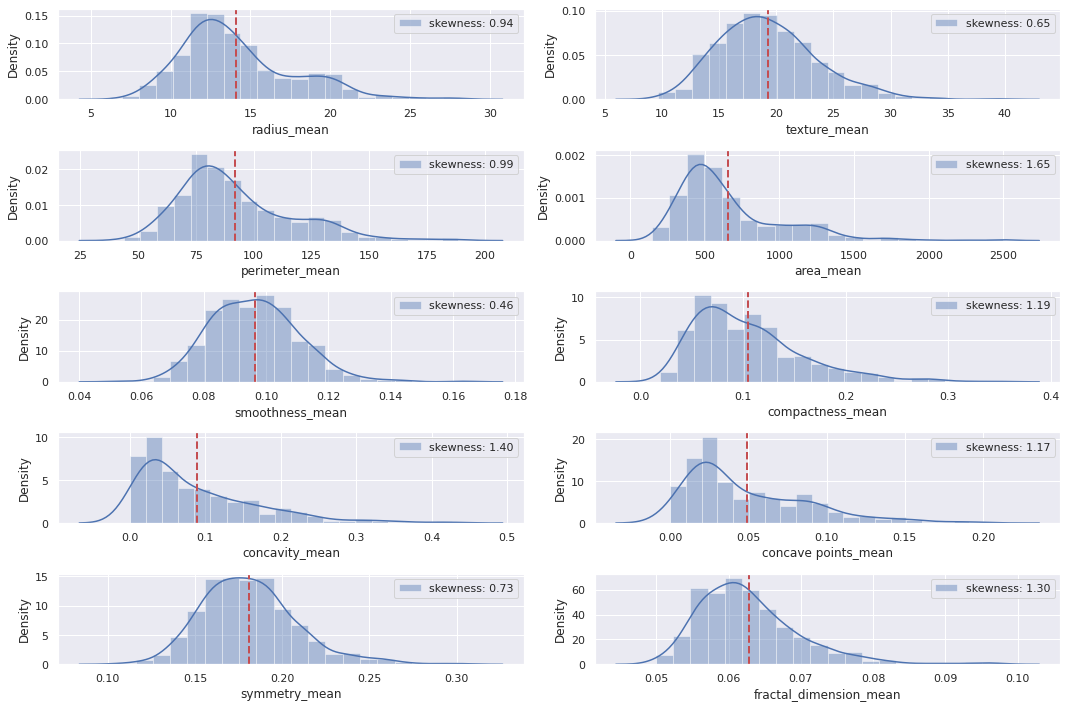

In [15]:
histograms(mean_features);

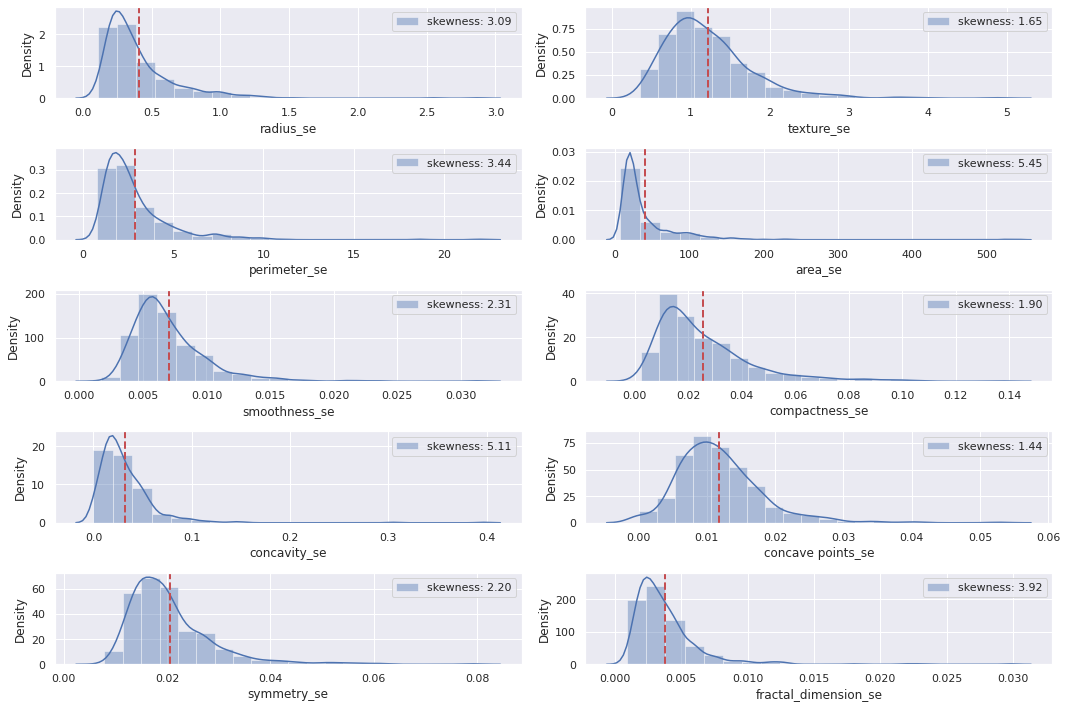

In [16]:
histograms(se_features);

Standard error is a statistical term that measures the accuracy with which a sample distribtion represents a population by using standard deviation.


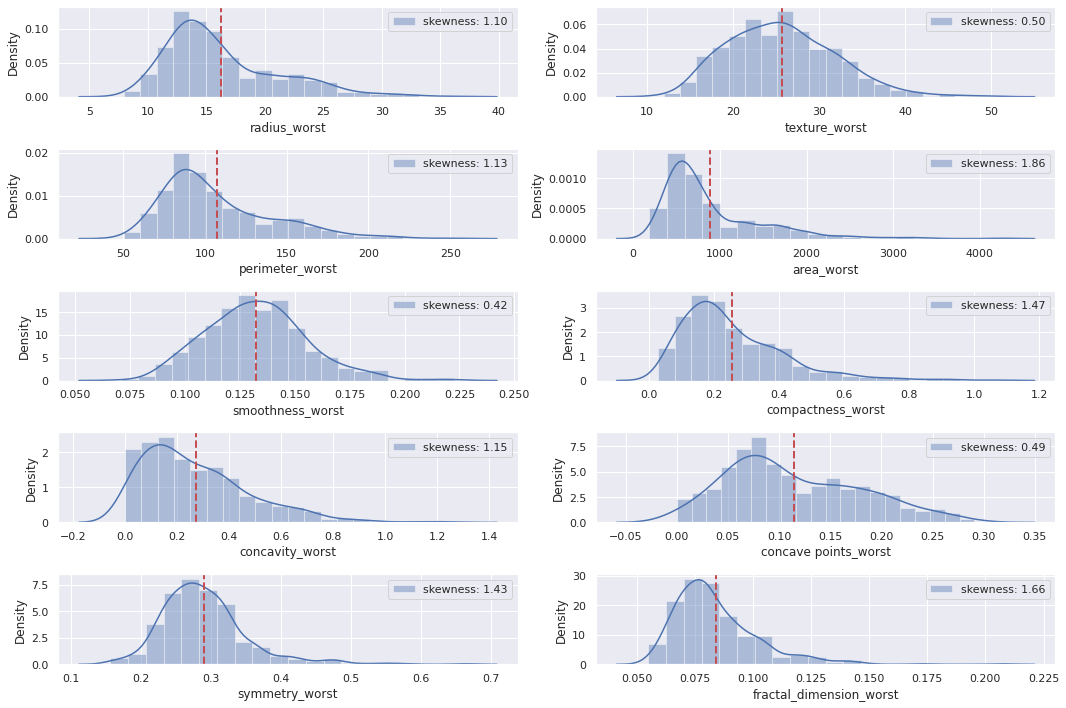

In [17]:
histograms(worst_features);

### 3. Distribution of Features According to Diagnosis

In [18]:
def feature_dist_diagnosis(data, features):   
    """
    Distribution (Malignant vs. Benign)    
    """
    feature_means = list(data.columns[1:11])
    fig = plt.figure(figsize=(15, 10))
    for idx, feature in enumerate(features):
        plt.subplot(5, 2, idx+1)
        sns.distplot(data[data['diagnosis']==1][feature], label='Malignant', color='red', bins=20)
        sns.distplot(data[data['diagnosis']==0][feature], label='Benign', color='green', bins=20)
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

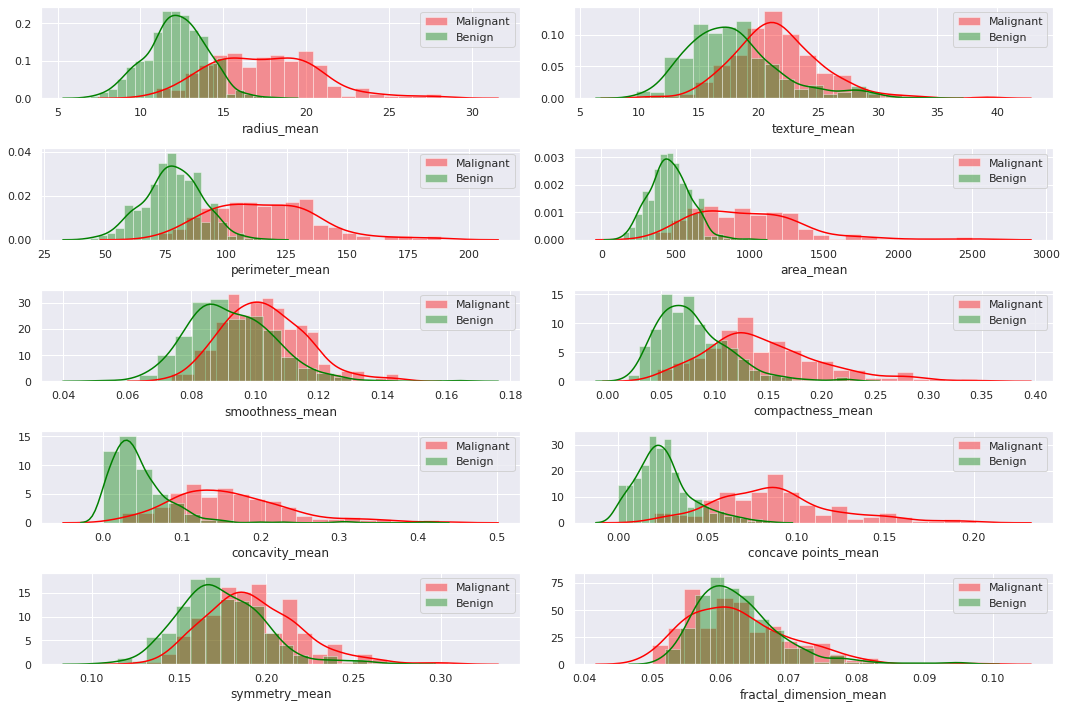

In [19]:
feature_dist_diagnosis(df, mean_features);

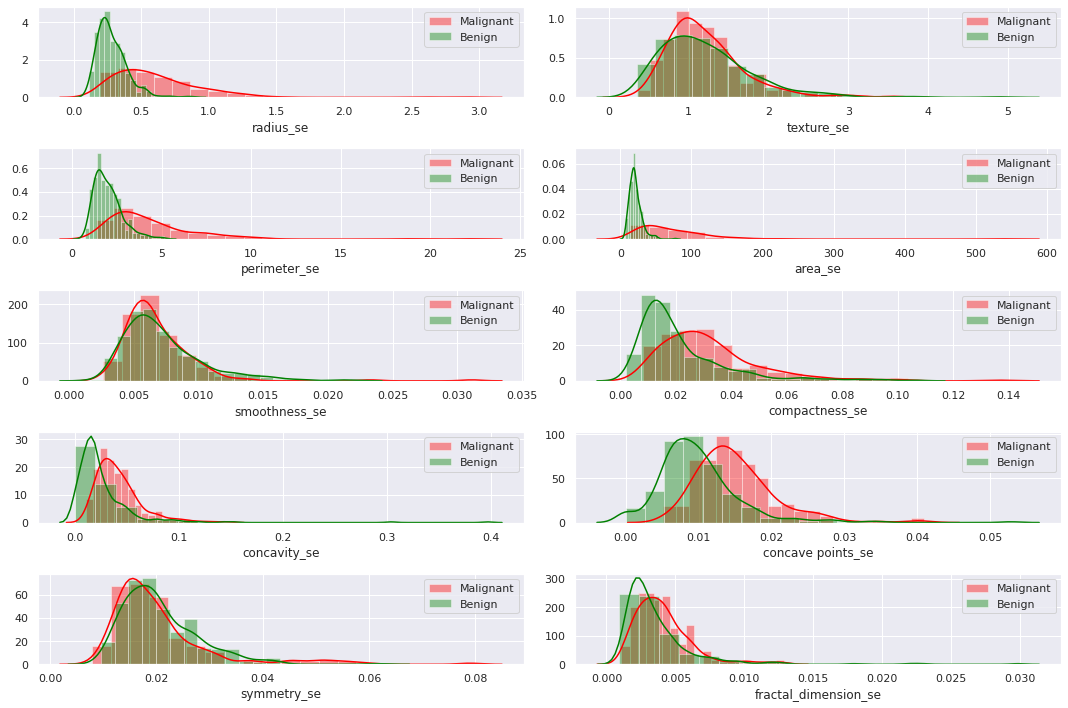

In [20]:
feature_dist_diagnosis(df, se_features);

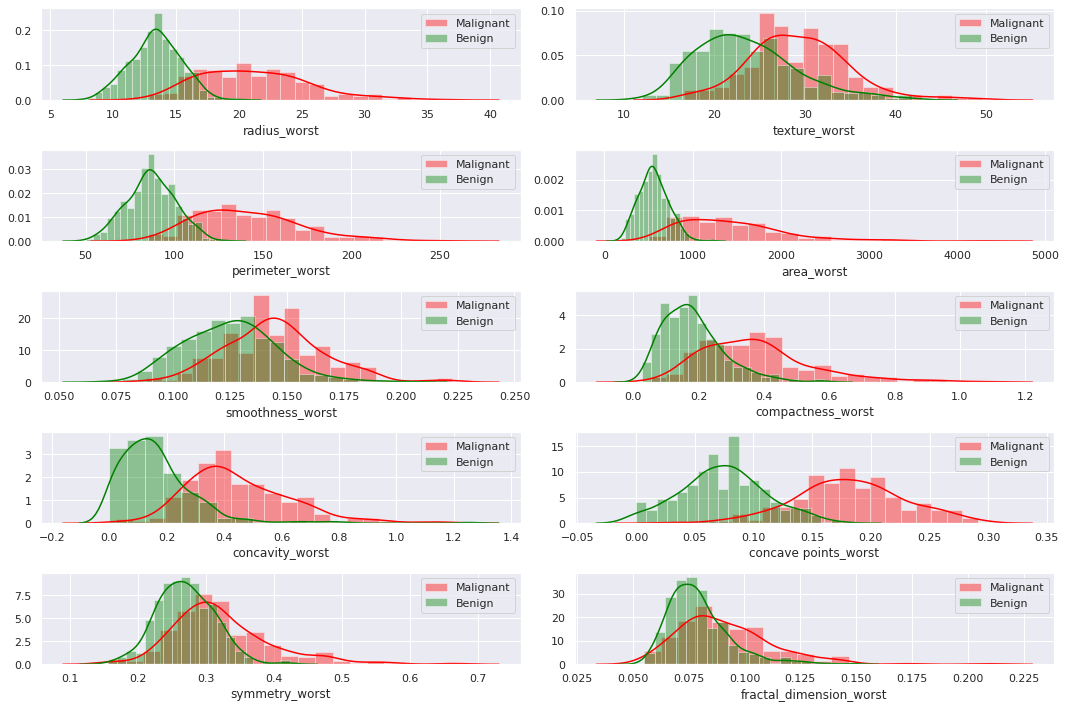

In [21]:
feature_dist_diagnosis(df, worst_features);

### Correlation of Features

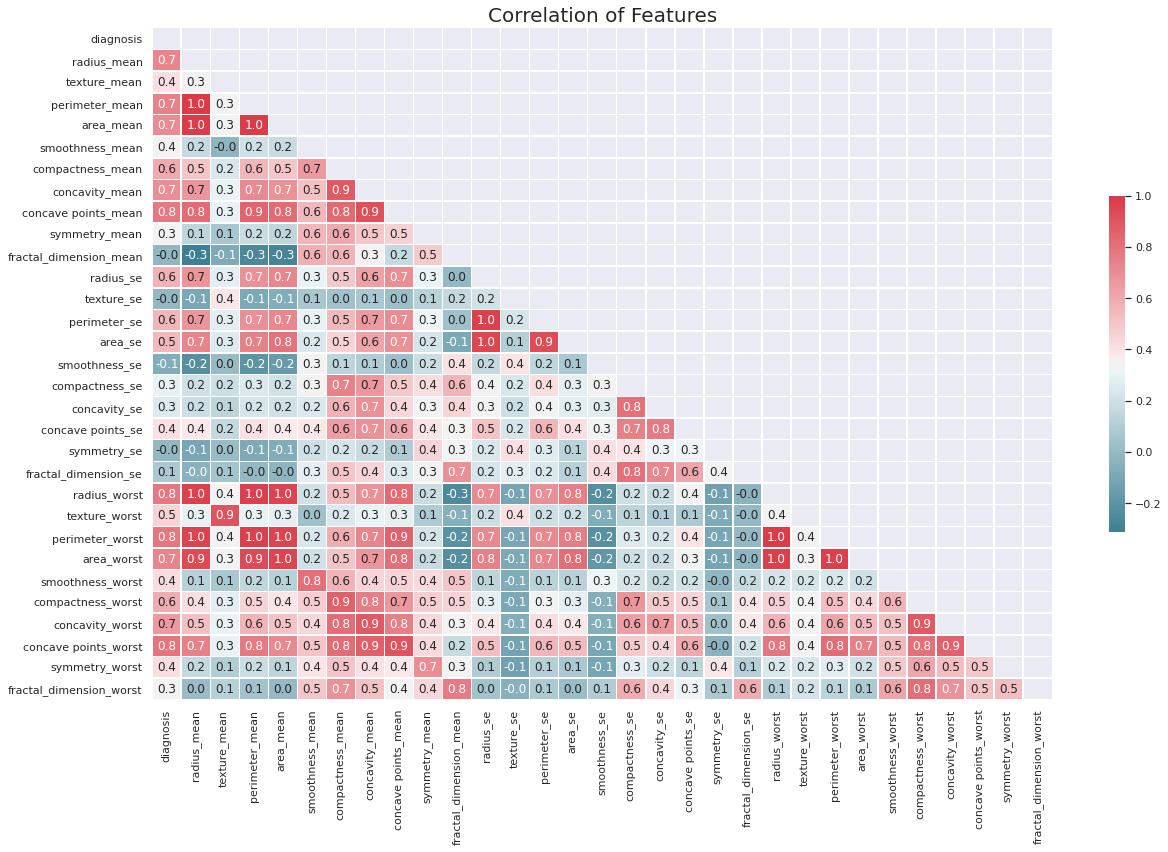

In [22]:
def correlation_heatmap(data):
    """
    
    """
    plt.figure(figsize=(18,12))
    
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', 
                lw=0, cmap=cmap, linewidth=0.5, 
                cbar_kws={'shrink': .5})
    plt.title('Correlation of Features', fontsize=20)
    plt.tight_layout()

correlation_heatmap(df);

In [23]:
Corr_df = df.corr(method='pearson')
Corr_df = Corr_df.mask(np.tril(np.ones(Corr_df.shape)).astype(np.bool))
Corr_df = Corr_df[abs(Corr_df) >= 0.7].stack().reset_index()
Corr_df.head(50)

,level_0,level_1,0
0,diagnosis,radius_mean,0.730029
1,diagnosis,perimeter_mean,0.742636
2,diagnosis,area_mean,0.708984
3,diagnosis,concave points_mean,0.776614
4,diagnosis,radius_worst,0.776454
5,diagnosis,perimeter_worst,0.782914
6,diagnosis,area_worst,0.733825
7,diagnosis,concave points_worst,0.793566
8,radius_mean,perimeter_mean,0.997855
9,radius_mean,area_mean,0.987357


In [24]:
Corr_features = Corr_df['level_0'].unique()
Corr_features

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst'], dtype=object)

In [25]:
Corr_diagnosis = Corr_df[Corr_df['level_0'] == 'diagnosis'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_radius_m = Corr_df[Corr_df['level_0'] == 'radius_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_texture_m = Corr_df[Corr_df['level_0'] == 'texture_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_perimeter_m = Corr_df[Corr_df['level_0'] == 'perimeter_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_area_m = Corr_df[Corr_df['level_0'] == 'area_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_smoothness_m = Corr_df[Corr_df['level_0'] == 'smoothness_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_compactness_m = Corr_df[Corr_df['level_0'] == 'compactness_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_concavity_m = Corr_df[Corr_df['level_0'] == 'concavity_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_concave_points_m = Corr_df[Corr_df['level_0'] == 'concave points_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)

Corr_fractal_dimension_m = Corr_df[Corr_df['level_0'] == 'fractal_dimension_mean'].sort_values(by=[0], ascending=False).reset_index(drop=True)


### Diagnosis vs Features

     level_0               level_1         0
0  diagnosis  concave points_worst  0.793566
1  diagnosis       perimeter_worst  0.782914
2  diagnosis   concave points_mean  0.776614
3  diagnosis          radius_worst  0.776454
4  diagnosis        perimeter_mean  0.742636
5  diagnosis            area_worst  0.733825
6  diagnosis           radius_mean  0.730029
7  diagnosis             area_mean  0.708984


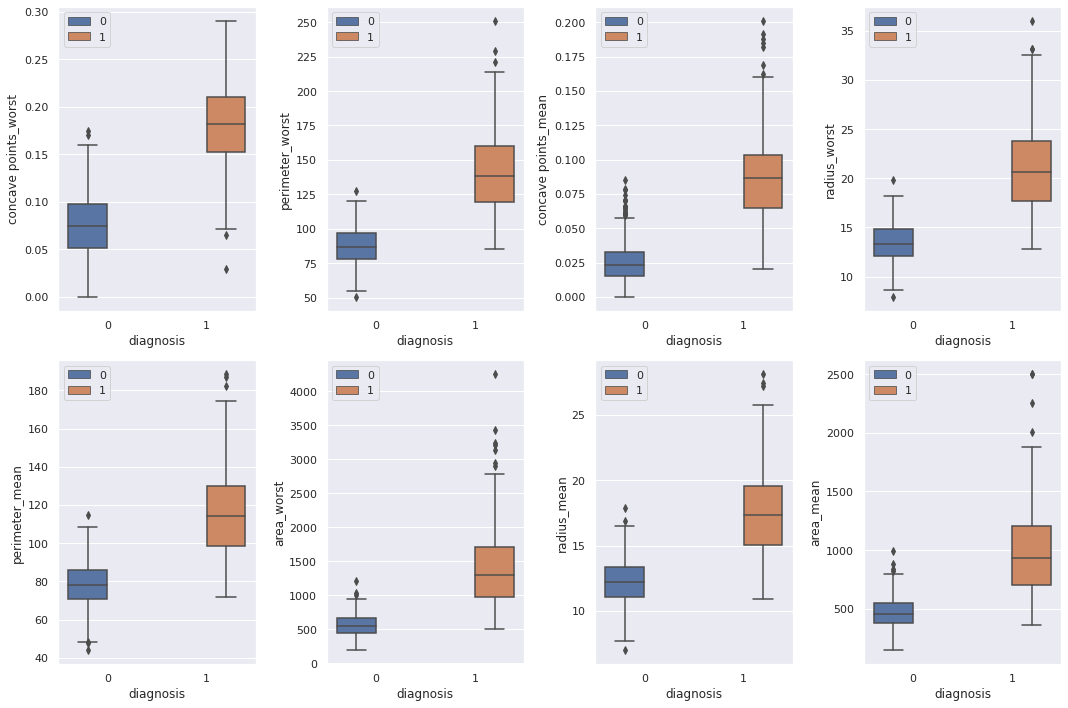

In [26]:
def corr_f_diag(data):   
    """
       
    """
    fig = plt.figure(figsize=(15, 10))
    for idx, item in enumerate(Corr_diagnosis['level_1']):
        plt.subplot(2, 4, idx+1)
        sns.boxplot(x='diagnosis', y=item, hue='diagnosis', data=data)
        plt.legend(loc='best')
    plt.tight_layout()
    print(Corr_diagnosis)
    plt.show()
    
corr_f_diag(df);

### Feature vs Feature

In [27]:
def feature_feature_corr(data, corr_data):
    """
    
    """
    fig = plt.figure(figsize=(15, 8))
    for idx, item in enumerate(corr_data['level_1']):
        plt.subplot(2, 4, idx+1)
        y = corr_data['level_0'][0]
        sns.scatterplot(x=item, y=y, hue='diagnosis', data=data)
        plt.legend(loc='best')
    plt.tight_layout()
    print(corr_data)
    plt.show()

       level_0               level_1         0
0  radius_mean        perimeter_mean  0.997855
1  radius_mean             area_mean  0.987357
2  radius_mean          radius_worst  0.969539
3  radius_mean       perimeter_worst  0.965137
4  radius_mean            area_worst  0.941082
5  radius_mean   concave points_mean  0.822529
6  radius_mean  concave points_worst  0.744214
7  radius_mean               area_se  0.735864


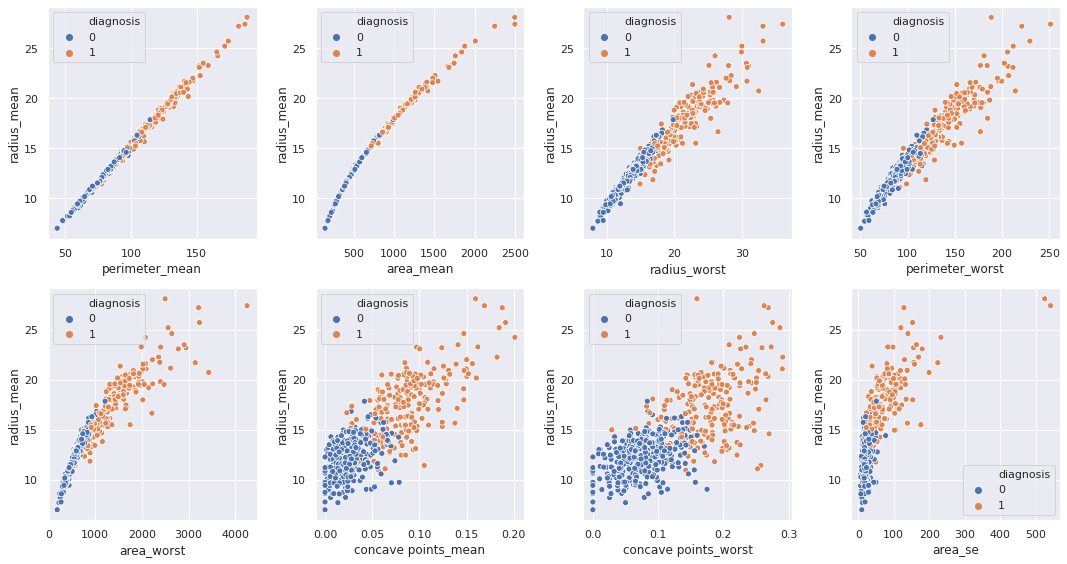

In [28]:
feature_feature_corr(df, Corr_radius_m);

        level_0        level_1         0
0  texture_mean  texture_worst  0.912045


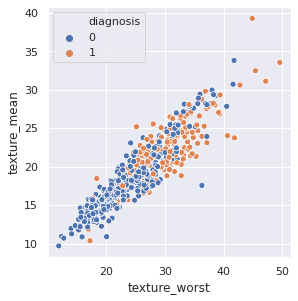

In [29]:
feature_feature_corr(df, Corr_texture_m);

          level_0               level_1         0
0  perimeter_mean             area_mean  0.986507
1  perimeter_mean       perimeter_worst  0.970387
2  perimeter_mean          radius_worst  0.969476
3  perimeter_mean            area_worst  0.941550
4  perimeter_mean   concave points_mean  0.850977
5  perimeter_mean  concave points_worst  0.771241
6  perimeter_mean               area_se  0.744983
7  perimeter_mean        concavity_mean  0.716136


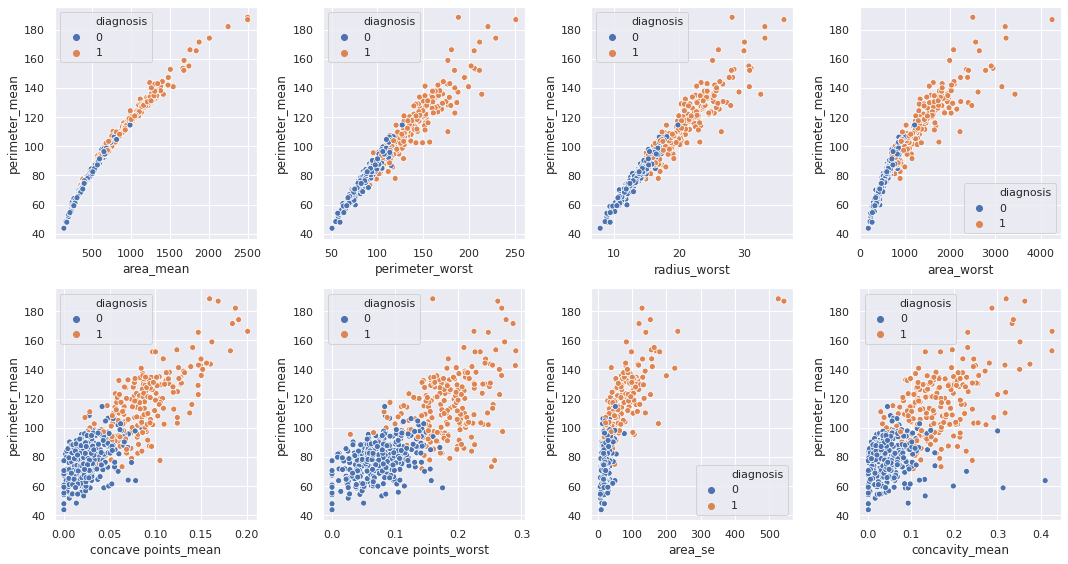

In [30]:
feature_feature_corr(df, Corr_perimeter_m);

     level_0               level_1         0
0  area_mean          radius_worst  0.962746
1  area_mean            area_worst  0.959213
2  area_mean       perimeter_worst  0.959120
3  area_mean   concave points_mean  0.823269
4  area_mean               area_se  0.800086
5  area_mean             radius_se  0.732562
6  area_mean          perimeter_se  0.726628
7  area_mean  concave points_worst  0.722017


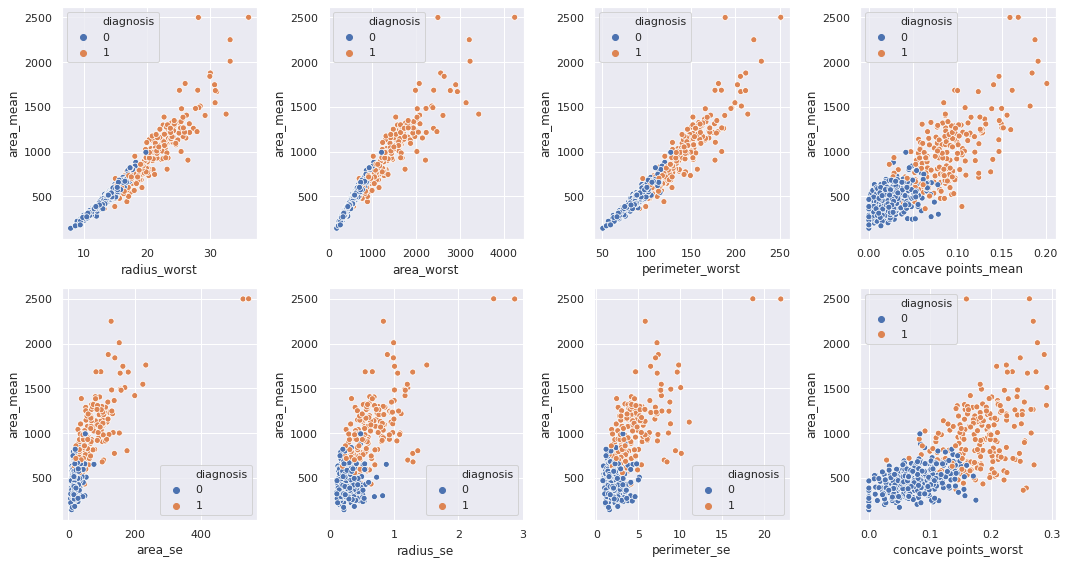

In [31]:
feature_feature_corr(df, Corr_area_m);

           level_0           level_1         0
0  smoothness_mean  smoothness_worst  0.805324


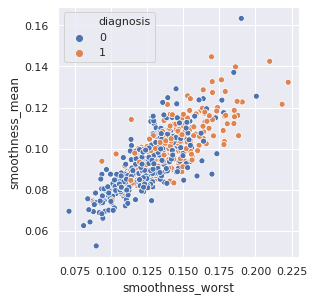

In [32]:
feature_feature_corr(df, Corr_smoothness_m);

            level_0               level_1         0
0  compactness_mean        concavity_mean  0.883121
1  compactness_mean     compactness_worst  0.865809
2  compactness_mean   concave points_mean  0.831135
3  compactness_mean       concavity_worst  0.816275
4  compactness_mean  concave points_worst  0.815573
5  compactness_mean        compactness_se  0.738722


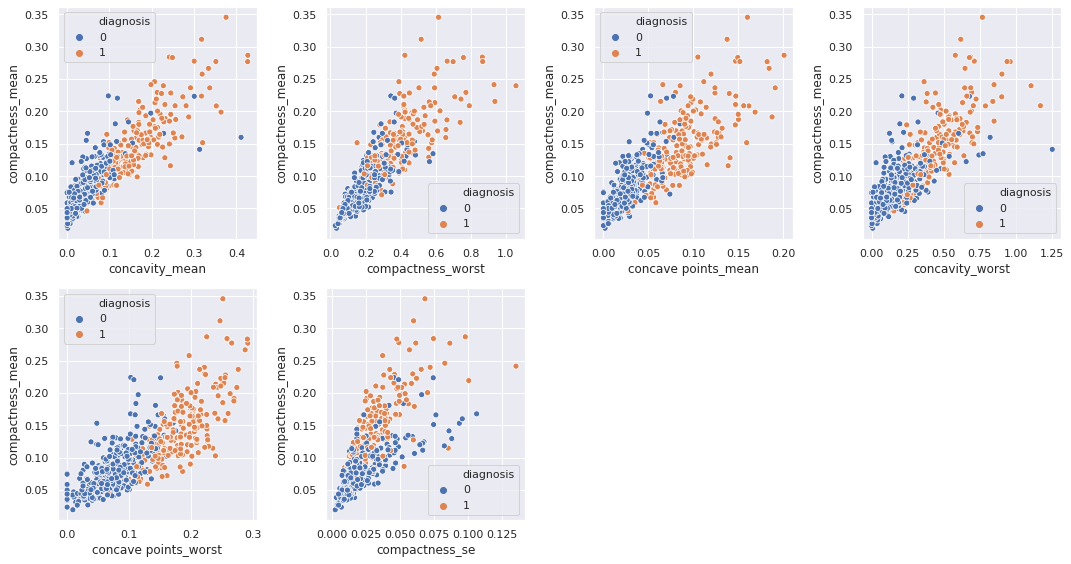

In [33]:
feature_feature_corr(df, Corr_compactness_m);

          level_0               level_1         0
0  concavity_mean   concave points_mean  0.921391
1  concavity_mean       concavity_worst  0.884103
2  concavity_mean  concave points_worst  0.861323
3  concavity_mean     compactness_worst  0.754968
4  concavity_mean       perimeter_worst  0.729565


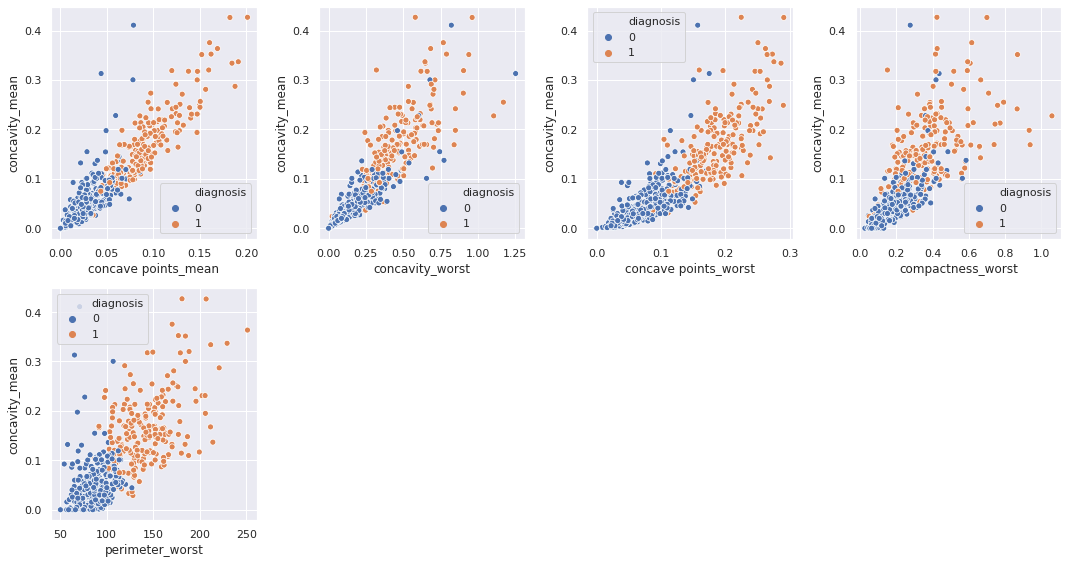

In [34]:
feature_feature_corr(df, Corr_concavity_m);

               level_0               level_1         0
0  concave points_mean  concave points_worst  0.910155
1  concave points_mean       perimeter_worst  0.855923
2  concave points_mean          radius_worst  0.830318
3  concave points_mean            area_worst  0.809630
4  concave points_mean       concavity_worst  0.752399
5  concave points_mean          perimeter_se  0.710650


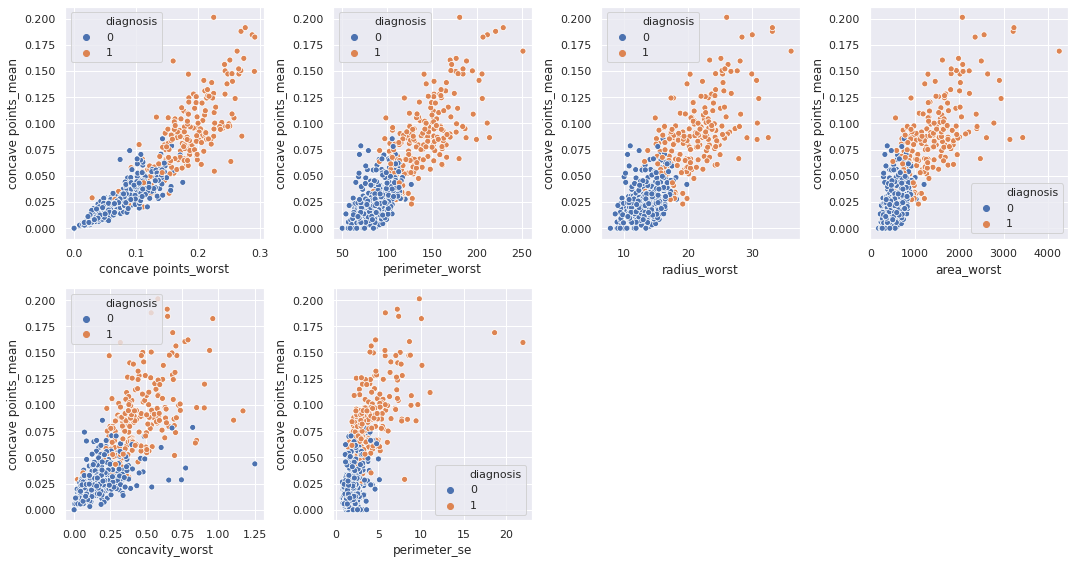

In [35]:
feature_feature_corr(df, Corr_concave_points_m);

                  level_0                  level_1         0
0  fractal_dimension_mean  fractal_dimension_worst  0.767297


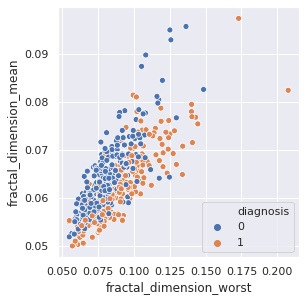

In [36]:
feature_feature_corr(df, Corr_fractal_dimension_m);

# 5. Training and Testing Data Split

### Feature Scaling

In [37]:
def feature_scaling(data):
    """
    Split dataset and standardize the dataset
    """
    y = data['diagnosis']
    x = data.drop('diagnosis', axis=1)
    x = (x - x.mean()) / x.std()
    return x, y

In [38]:
def get_data_split(data):
    """
    Train-test split (Train : Test = 70% : 30%)
    """
    X, y = feature_scaling(data);
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    print("Train Shape: ", X_train.shape)
    print("Test Shape: ", X_test.shape)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_data_split(df);
X_train.head()

Train Shape:  (398, 30)
Test Shape:  (171, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
257,0.338448,-0.469573,0.462199,0.165981,2.640741,2.349035,1.956862,1.940086,2.138963,1.864265,...,0.302242,-0.490904,0.373150,0.084687,1.932839,1.245960,0.818273,1.647496,0.577435,1.946385
283,0.599512,-0.120819,0.692661,0.426840,0.728073,1.436377,1.329666,1.072108,0.234846,0.572547,...,0.471901,-0.095542,0.584443,0.264187,0.180945,1.374983,1.104433,0.891400,-0.211348,1.237686
269,-0.969706,0.255834,-0.924690,-0.880866,0.841838,0.465021,-0.054181,-0.521847,-0.523883,0.824659,...,-0.947437,-0.076018,-0.915145,-0.825814,0.049553,0.004671,-0.090059,-0.435193,-0.478047,0.169655
208,-0.288671,0.755714,-0.203672,-0.356590,0.273015,0.832356,-0.021943,0.054142,0.140005,1.459187,...,-0.355701,0.566650,-0.231566,-0.423782,0.110869,1.181766,0.210961,-0.030521,1.983667,1.309664
400,1.073398,0.402310,1.334664,0.963618,1.894161,2.901932,2.886368,1.826692,1.099359,1.182997,...,0.937427,0.342123,1.259988,0.743676,2.405850,2.144671,3.025590,1.244346,0.556422,1.985142


# 6. Model Building

## 6-1. Logistic Regression

In [39]:
def get_test_score(model, X_test, y_test):
    """
    Get test accuracy score for models
    """
    model_score = model.score(X_test, y_test)
    return model_score

In [40]:
from sklearn.metrics import accuracy_score

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_train)
train_score = accuracy_score(y_train, y_pred_logreg)
pred = logreg_model.predict(X_test)
val_score = accuracy_score(y_test, pred)

print('Logistic Regression Model')
print('Training Accuracy Score: {}'.format(train_score))
print('Test Accuracy Score: {}'.format(val_score))
print(classification_report(y_test, pred))

Logistic Regression Model
Training Accuracy Score: 0.9849246231155779
Test Accuracy Score: 0.9766081871345029
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       107
           1       0.94      1.00      0.97        64

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



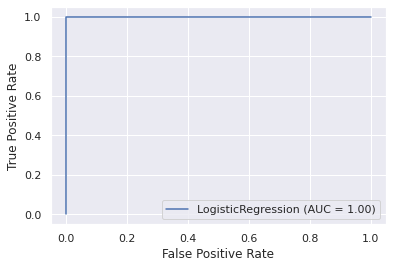

In [41]:
plot_roc_curve(logreg_model, X_test, y_test);

In [42]:
def conf_matrix(y_test, y_predict):
    """
    Plot a confusion matrix of models
    """
    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', 
                cbar_kws={'shrink': .5})
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()
    return plt

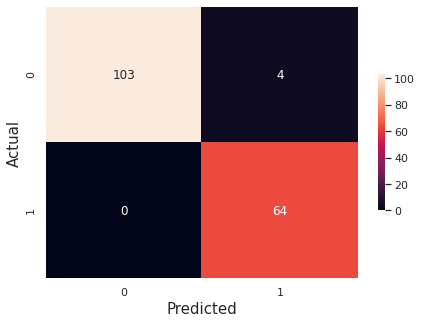

In [43]:
# Confusion matrix of logistic regression
conf_matrix(y_test, pred);

## 6-2. Random Forest

In [44]:
# Random Forest Classification Model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

print('Random Forest Model')
print('Training Accuracy Score:', rf_model.score(X_train, y_train))
print('Test Accuracy Score:', rf_model.score(X_test, y_test))

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Random Forest Model
Training Accuracy Score: 1.0
Test Accuracy Score: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



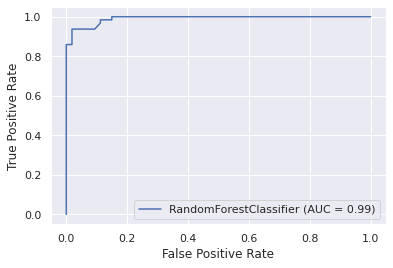

In [45]:
plot_roc_curve(rf_model, X_test, y_test);

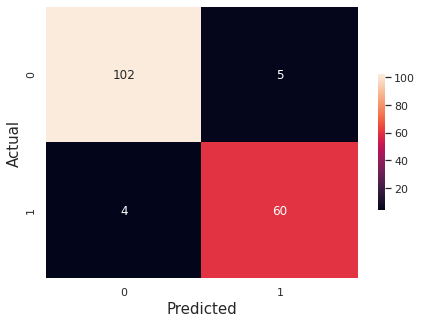

In [46]:
# Confusion matrix of random forest
conf_matrix(y_test, y_pred_rf);

# 7. Recursive Feature Elimination with Cross-validation (RFECV)

## 7-1. RFECV for Logistic Regression

In [47]:
rfecv_logreg = RFECV(estimator=logreg_model, step=1, 
                     cv=StratifiedKFold(5), scoring='accuracy')
rfecv_logreg = rfecv_logreg.fit(X_train, y_train)

print('Optimal number of features in LogisticRegression:', rfecv_logreg.n_features_)
print('Best featuures in LogisticRegression:', X_train.columns[rfecv_logreg.support_])

Optimal number of features in LogisticRegression: 11
Best featuures in LogisticRegression: Index(['concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [48]:
def rfecv_grid_scores(model):
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(model.grid_scores_) + 1), model.grid_scores_);
    plt.xlabel('Number of features selected')
    plt.ylabel('Cross validation score')
    plt.show()

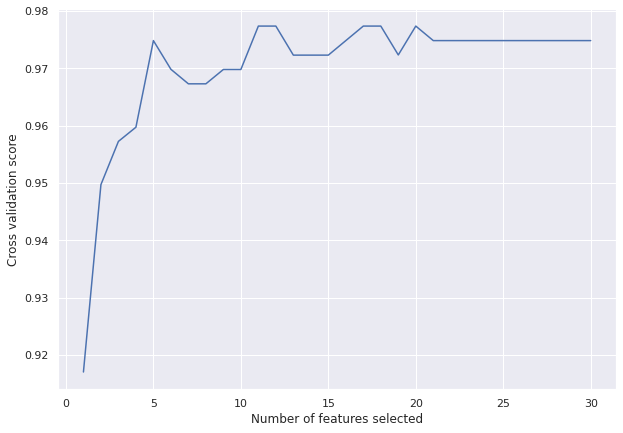

In [49]:
rfecv_grid_scores(rfecv_logreg);

In [50]:
y_rfe_logreg = rfecv_logreg.predict(X_test)

print('Logistic Regression with RFECV')
print( 'Training Accuracy Score:', rfecv_logreg.score(X_train, y_train))
print( 'Test Accuracy Score:', rfecv_logreg.score(X_test, y_test))
print(classification_report(y_test, y_rfe_logreg))

Logistic Regression with RFECV
Training Accuracy Score: 0.9824120603015075
Test Accuracy Score: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.94      0.97      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## 7-2. RFECV for Random Forest

In [51]:
rfecv_rf = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_rf = rfecv_rf.fit(X_train, y_train)

print('Optimal number of features in RandomForest:', rfecv_rf.n_features_)
print('Best featuures in RandomForest:', X_train.columns[rfecv_rf.support_])

Optimal number of features in RandomForest: 13
Best featuures in RandomForest: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


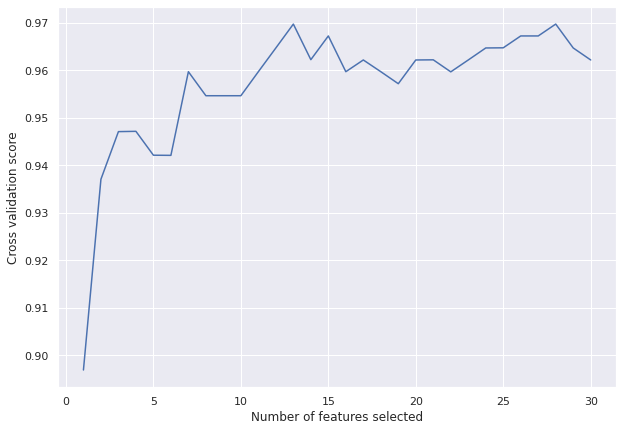

In [52]:
rfecv_grid_scores(rfecv_rf);

In [53]:
y_rfe_rf = rfecv_rf.predict(X_test)

print('Logistic Regression with RFECV')
print( 'Training Accuracy Score:', rfecv_rf.score(X_train, y_train))
print( 'Test Accuracy Score:', rfecv_rf.score(X_test, y_test))
print(classification_report(y_test, y_rfe_rf))

Logistic Regression with RFECV
Training Accuracy Score: 1.0
Test Accuracy Score: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



# 8. Confusion Matrix

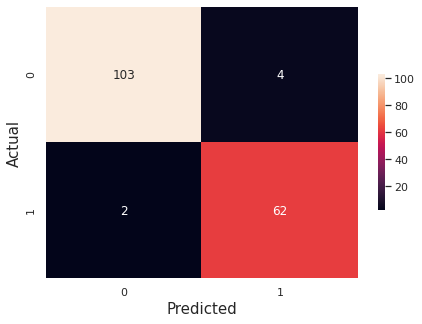

In [54]:
# Confusion matrix of Logistic Regression with RFECV
conf_matrix(y_test, y_rfe_logreg);

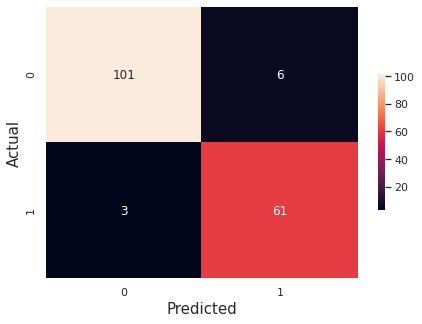

In [55]:
# Confusion matrix of Random Forest with RFECV
conf_matrix(y_test, y_rfe_rf);

## Thanks for reading! If you have any advice, please leave a comment down below.